# EDA (Exploratory Data Analytics)

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import ast
pd.set_option('display.max_columns',None)

# Fetch the Clean Data

In [2]:
youtube = pd.read_csv('cleaned_data.csv')
youtube.head(3)

,title,daily_rank,daily_movement,weekly_movement,country,view_count,like_count,comment_count,description,video_id,channel_id,video_tags,publish_date,langauge,channel_title,category_id,definition,caption_status,title_processed,description_processed,video_tags_processed,channel_title_processed,publish_year,publish_month,publish_day,publish_dayofweek,duration_seconds
0,Discord Loot Boxes are here.,1,49,49,US,1407108038,69908,7789,Why would we ever bring Loot Boxes into a chat...,cc2-4ci4G84,UCZ5XnGb-3t7jCkXdawN2tkA,-,2024-04-01 00:00:00+00:00,en,Discord,24.0,hd,False,discord loot box,would ever bring loot box chat app open discor...,NaN,discord,2024,4,1,0,18
1,Grand Theft Auto VI Trailer 1,14,-9,36,US,130980218,10301883,802501,Song: Love Is A Long Road\nArtist: Tom Petty\n...,QdBZY2fkU-0,UC6VcWc1rAoWdBCM0JxrRQ3A,"Rockstar Games, Grand Theft Auto VI, GTAVI, GT...",2023-12-04 00:00:00+00:00,en,Rockstar Games,20.0,hd,True,grand theft auto vi trailer,song love long road artist tom petty written t...,rockstar game grand theft auto vi gtavi gta gt...,rockstar game,2023,12,4,0,91
2,I Survived 7 Days In An Abandoned City,50,-29,0,US,99937514,4271480,160164,This was one of the hardest challenges weâve...,tWYsfOSY9vY,UCX6OQ3DkcsbYNE6H8uQQuVA,-,2024-03-02 00:00:00+00:00,en,MrBeast,24.0,hd,True,survived day abandoned city,one hardest challenge weve ever done deal good...,NaN,mrbeast,2024,3,2,5,1044


# Check the Null Values

In [3]:
youtube.isna().sum()

title                         0
daily_rank                    0
daily_movement                0
weekly_movement               0
country                       0
view_count                    0
like_count                    0
comment_count                 0
description                   0
video_id                      0
channel_id                    0
video_tags                    0
publish_date                  0
langauge                      0
channel_title                 0
category_id                   0
definition                    0
caption_status                0
title_processed               7
description_processed        62
video_tags_processed       1712
channel_title_processed      17
publish_year                  0
publish_month                 0
publish_day                   0
publish_dayofweek             0
duration_seconds              0
dtype: int64

# Replace Null with Empty String

In [4]:
youtube = youtube.replace(np.nan, ' ')
youtube.isna().sum().sum()

0

In [5]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10246 entries, 0 to 10245
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    10246 non-null  object 
 1   daily_rank               10246 non-null  int64  
 2   daily_movement           10246 non-null  int64  
 3   weekly_movement          10246 non-null  int64  
 4   country                  10246 non-null  object 
 5   view_count               10246 non-null  int64  
 6   like_count               10246 non-null  int64  
 7   comment_count            10246 non-null  int64  
 8   description              10246 non-null  object 
 9   video_id                 10246 non-null  object 
 10  channel_id               10246 non-null  object 
 11  video_tags               10246 non-null  object 
 12  publish_date             10246 non-null  object 
 13  langauge                 10246 non-null  object 
 14  channel_title         

# EDA

In [6]:
# Define numerical 
numerical_features = ['daily_rank', 'daily_movement', 'weekly_movement', 'like_count', 'view_count','comment_count']

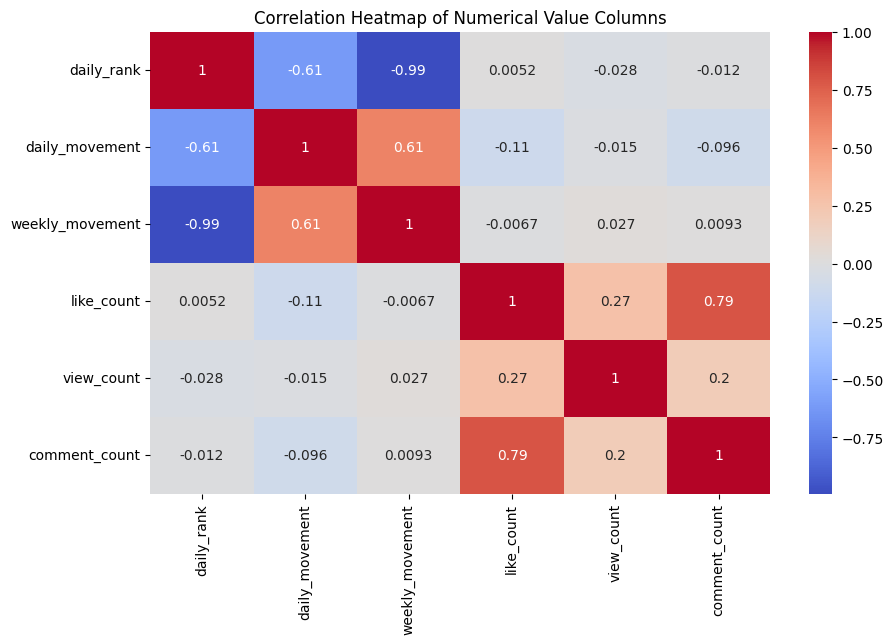

In [7]:
# Calculate correlation matrix
correlation_matrix = youtube[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

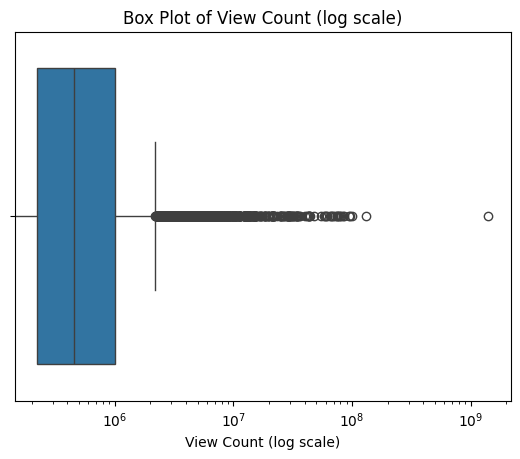

In [8]:
# Box plot for View Count
sns.boxplot(x='view_count', data=youtube)
plt.xscale('log')
plt.title('Box Plot of View Count (log scale)')
plt.xlabel('View Count (log scale)')
plt.show()


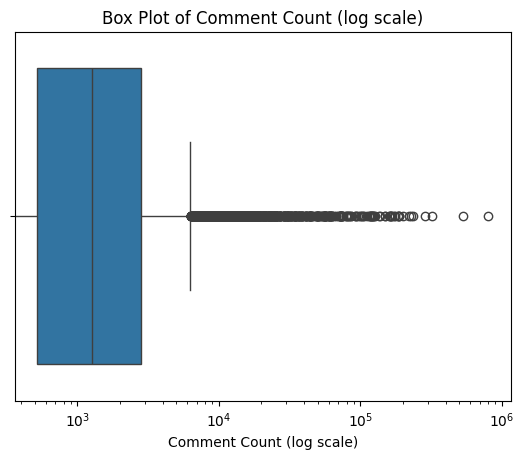

In [9]:
# Box plot for Comment Count
sns.boxplot(x='comment_count', data=youtube)
plt.xscale('log')
plt.title('Box Plot of Comment Count (log scale)')
plt.xlabel('Comment Count (log scale)')
plt.show()

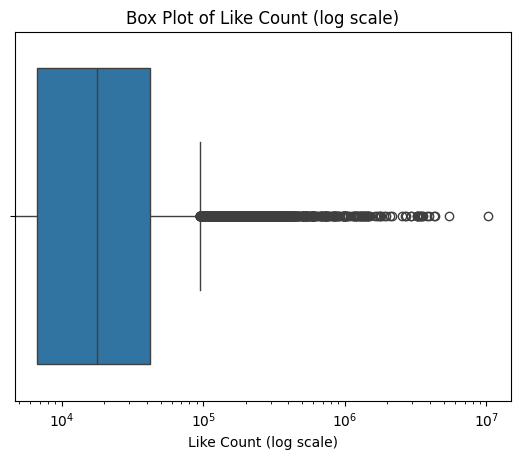

In [10]:
# Box plot for View Count
sns.boxplot(x='like_count', data=youtube)
plt.xscale('log')
plt.title('Box Plot of Like Count (log scale)')
plt.xlabel('Like Count (log scale)')
plt.show()

#### we can observe outliers from the box plot but they are more important which have vast view count

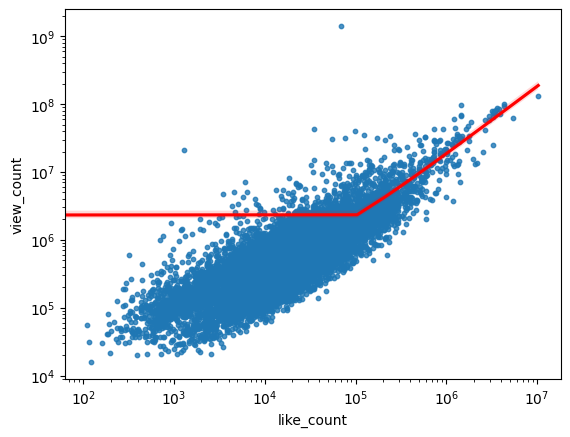

In [11]:
plt.xscale('log')
plt.yscale('log')
sns.regplot(x='like_count', y='view_count', data=youtube, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.show()

# Analyzing Range for view_count and comment_count

In [12]:
print(youtube['comment_count'].max())
youtube['view_count'].max()

802501


1407108038

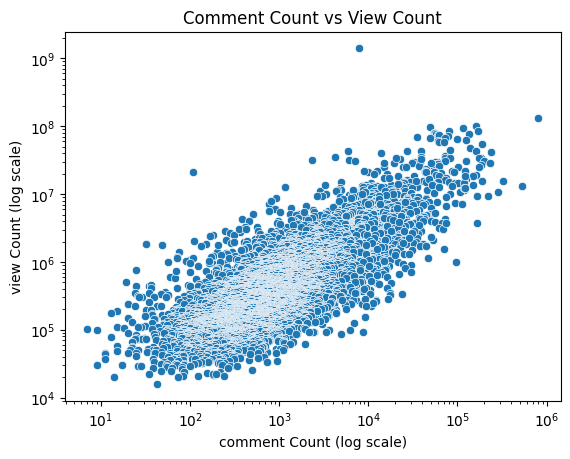

In [13]:
sns.scatterplot(x='comment_count', y='view_count', data=youtube)

# Setting logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Adding titles and labels
plt.title('Comment Count vs View Count')
plt.xlabel('comment Count (log scale)')
plt.ylabel('view Count (log scale)')

# Show the plot
plt.show()

In [14]:
youtube['daily_movement'].max()

49

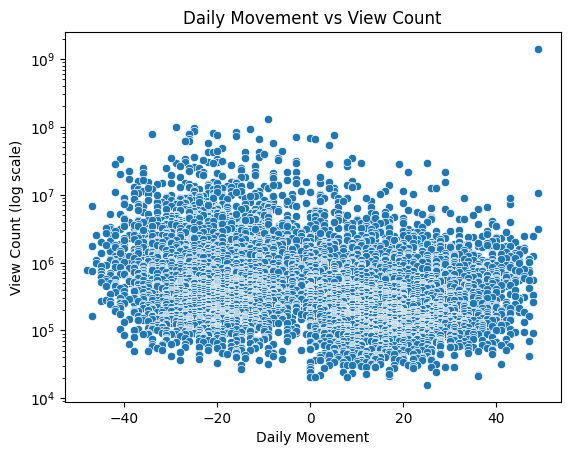

In [15]:
# Using Seaborn for a scatter plot with a logarithmic scale for view count
sns.scatterplot(x='daily_movement', y='view_count', data=youtube)

# Setting logarithmic scale for the x-axis (view count)
plt.yscale('log')

# Adding titles and labels
plt.title('Daily Movement vs View Count')
plt.xlabel('Daily Movement')
plt.ylabel('View Count (log scale)')

# Show the plot
plt.show()


In [16]:
categorical_features = categorical_features = ['country', 'langauge', 'definition', 'caption_status', 'publish_year', 'publish_month', 'publish_day', 'publish_dayofweek']

In [17]:
youtube['langauge'].value_counts(dropna = False)

langauge
en        7051
en-GB     1433
en-US      937
fr         215
ko         163
Other      151
en-CA       97
es          75
ja          40
hi          31
es-419      31
pa          22
Name: count, dtype: int64

C:\Users\H P\AppData\Local\Temp\ipykernel_14944\654798790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='langauge', y='log_viewCount', data=youtube, palette='viridis')


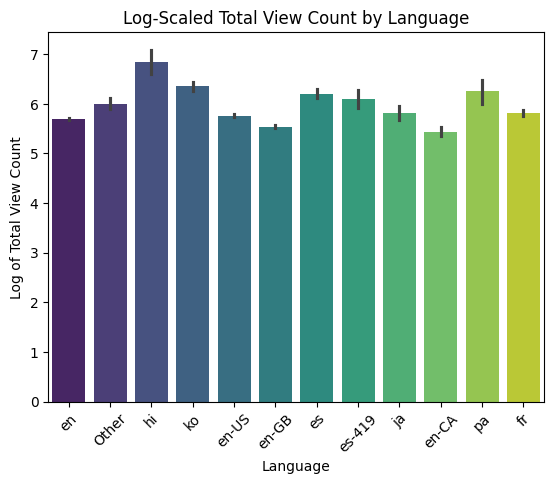

In [18]:
# Apply logarithmic transformation to viewCount
youtube['log_viewCount'] = youtube['view_count'].apply(lambda x: x if x == 0 else np.log10(x))

# Using Seaborn to create a bar plot with logarithmic scaled view counts
sns.barplot(x='langauge', y='log_viewCount', data=youtube, palette='viridis')

# Adding titles and labels
plt.title('Log-Scaled Total View Count by Language')
plt.xlabel('Language')
plt.ylabel('Log of Total View Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


C:\Users\H P\AppData\Local\Temp\ipykernel_14944\1999206445.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='log_viewCount', data=youtube, palette='viridis')


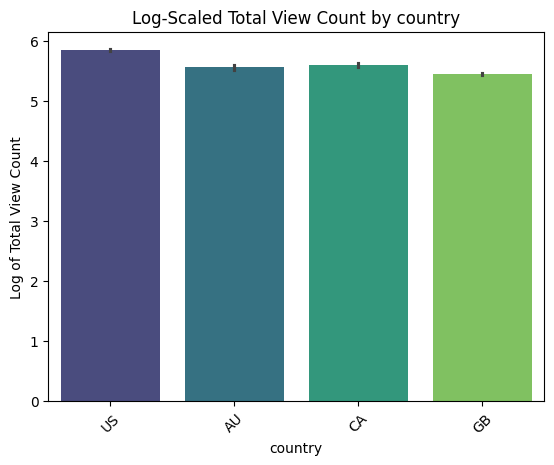

In [19]:
sns.barplot(x='country', y='log_viewCount', data=youtube, palette='viridis')

# Adding titles and labels
plt.title('Log-Scaled Total View Count by country')
plt.xlabel('country')
plt.ylabel('Log of Total View Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# --------------------------------------------------------------------------------

In [20]:
def parse_or_split(value):
    try:
        # Try to parse it as a list
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # If it fails, split the string into words
        return value.split()

# Apply the function to parse or split the strings
youtube['title_processed'] = youtube['title_processed'].apply(parse_or_split)

# Join words with a comma in each row for 'Column1'
youtube['title_processed'] = youtube['title_processed'].apply(lambda x: ','.join(x))

In [21]:
list(youtube['title_processed'])

['discord,loot,box',
 'grand,theft,auto,vi,trailer',
 'survived,day,abandoned,city',
 'pushpa,rule,teaser,allu,arjun,sukumar,rashmika,mandanna,fahadh,faasil,dsp',
 'day,stranded,island',
 'v,private,island',
 'age,decide,win',
 'every,day,survive,grocery,store',
 'survive,day,trapped,win',
 'v,job',
 'face,biggest,fear,win',
 'protect,keep',
 'spent,day,solitary,confinement',
 'rescued,abandoned,dog',
 'still,season,cinematic,league,legend,ft,fort,tiffany,aris,wei',
 'world,deadliest,laser,maze',
 'dunki,drop,shah,rukh,khan,rajkumar,hirani,taapsee,vicky,boman,st,dec',
 'stop,train,win,lamborghini',
 'built,well,africa',
 'animal,official,trailer,ranbir,kapoor,rashmika,anil,k,bobby,sandeep,vanga,bhushan,k',
 'protect,yacht,keep',
 'minute,room,explode',
 'babymonster,sheesh,mv',
 'babymonster,batter,mv',
 'dunki,drop,shah,rukh,khan,rajkumar,hirani,taapsee,vicky,boman,christmas',
 'guntur,kaaram,theatrical,trailer,mahesh,babu,sreeleela,trivikram,thaman',
 'amazing,digital,circus,ep,candy

In [22]:
# Flatten the list of tags
tags = list(youtube['title_processed'])
all_words = []
for tag_list in tags:
    words = tag_list.split(',')  
    all_words.extend(words)

# Count the frequency of each word
freq_dist = FreqDist(all_words)

# Get the most common words
most_common_words = freq_dist.most_common(50)

# Display the most common words
print("Most common words:", most_common_words)
# Finding the 50 most used words in video titles
top_words = []
freqs = []
for word, freq in most_common_words:
    top_words.append(word)
    freqs.append(freq)

Most common words: [('v', 1077), ('highlight', 1056), ('official', 903), ('video', 734), ('trailer', 481), ('league', 404), ('new', 400), ('game', 349), ('music', 313), ('first', 268), ('day', 244), ('full', 231), ('premier', 216), ('united', 211), ('world', 204), ('live', 189), ('ft', 187), ('season', 183), ('win', 181), ('cup', 180), ('minecraft', 173), ('champion', 167), ('man', 165), ('city', 163), ('fortnite', 160), ('manchester', 160), ('best', 159), ('ep', 153), ('sport', 151), ('one', 149), ('final', 146), ('every', 140), ('le', 138), ('reaction', 138), ('year', 136), ('de', 133), ('liverpool', 133), ('x', 126), ('review', 126), ('la', 124), ('real', 124), ('life', 123), ('part', 121), ('round', 120), ('time', 119), ('arsenal', 119), ('teaser', 117), ('car', 116), ('chelsea', 116), ('get', 115)]


C:\Users\H P\AppData\Local\Temp\ipykernel_14944\2014940434.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words,y=freqs, palette="rocket")


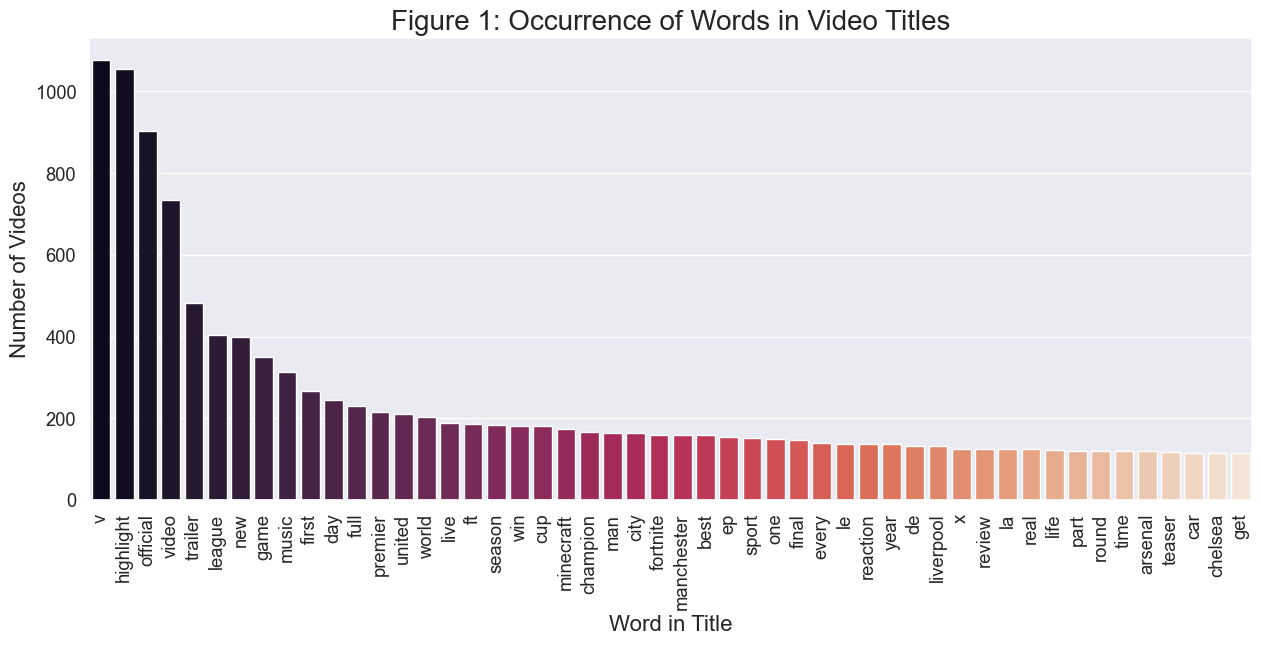

In [23]:
sns.set(font_scale=1.2)
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.barplot(x=top_words,y=freqs, palette="rocket")
plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()


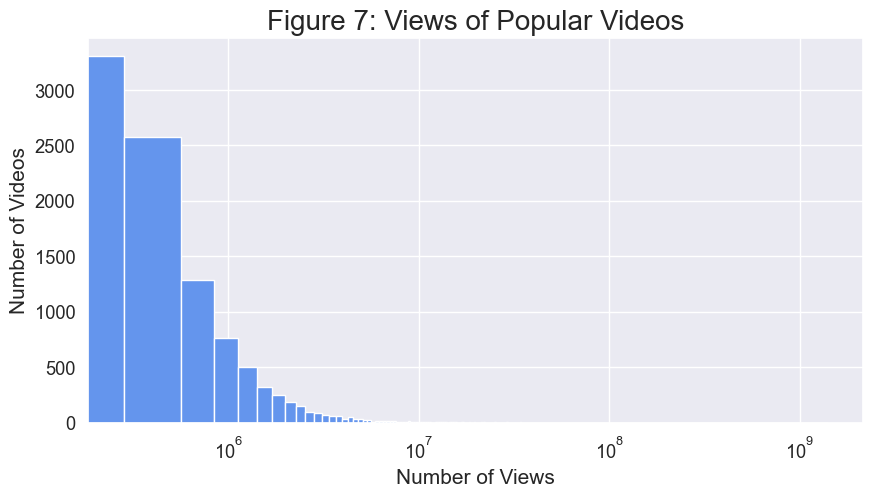

In [24]:
# Histogram of the views data for all the videos
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
v1 = youtube['view_count'].hist(bins=5000, color='cornflowerblue')

plt.xscale('log') # Set x-axis to logarithmic scale
plt.xlabel('Number of Views', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Figure 7: Views of Popular Videos', fontsize=20)
plt.show()

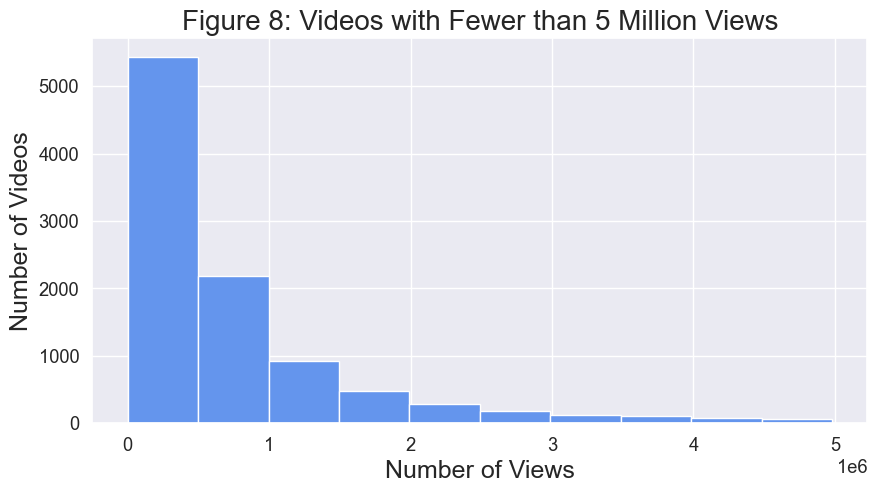

In [25]:
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

v5million = youtube[youtube['view_count'] < 5e6]['view_count']

plt.figure(figsize=(10, 5))
v2 = v5million.hist(color='cornflowerblue')

plt.xlabel('Number of Views', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 8: Videos with Fewer than 5 Million Views', fontsize=20)

plt.show()

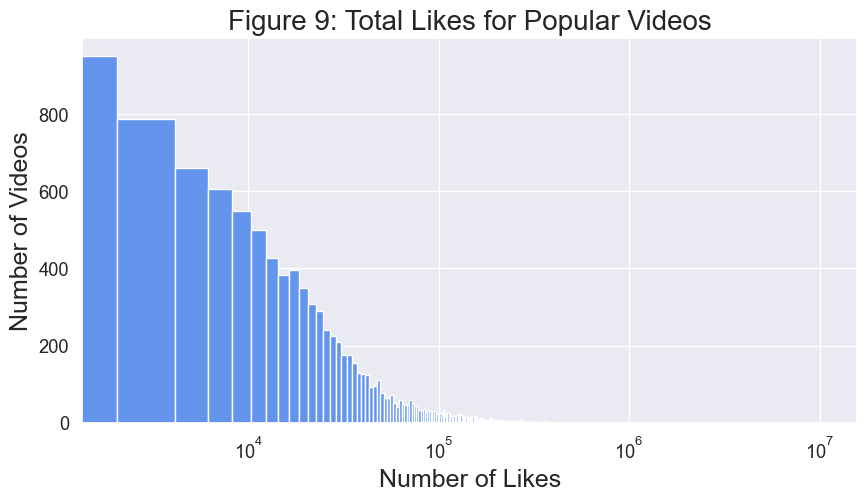

In [26]:
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
l1 = youtube['like_count'].hist(bins=5000, color='cornflowerblue')

plt.xscale('log')
plt.xlabel('Number of Likes', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 9: Total Likes for Popular Videos', fontsize=20)

plt.show()

In [27]:
youtube['like_count'].max()

10301883

In [28]:
youtube['country'].value_counts()

country
US    5790
GB    2207
CA    1187
AU    1062
Name: count, dtype: int64

C:\Users\H P\AppData\Local\Temp\ipykernel_14944\1146343843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")


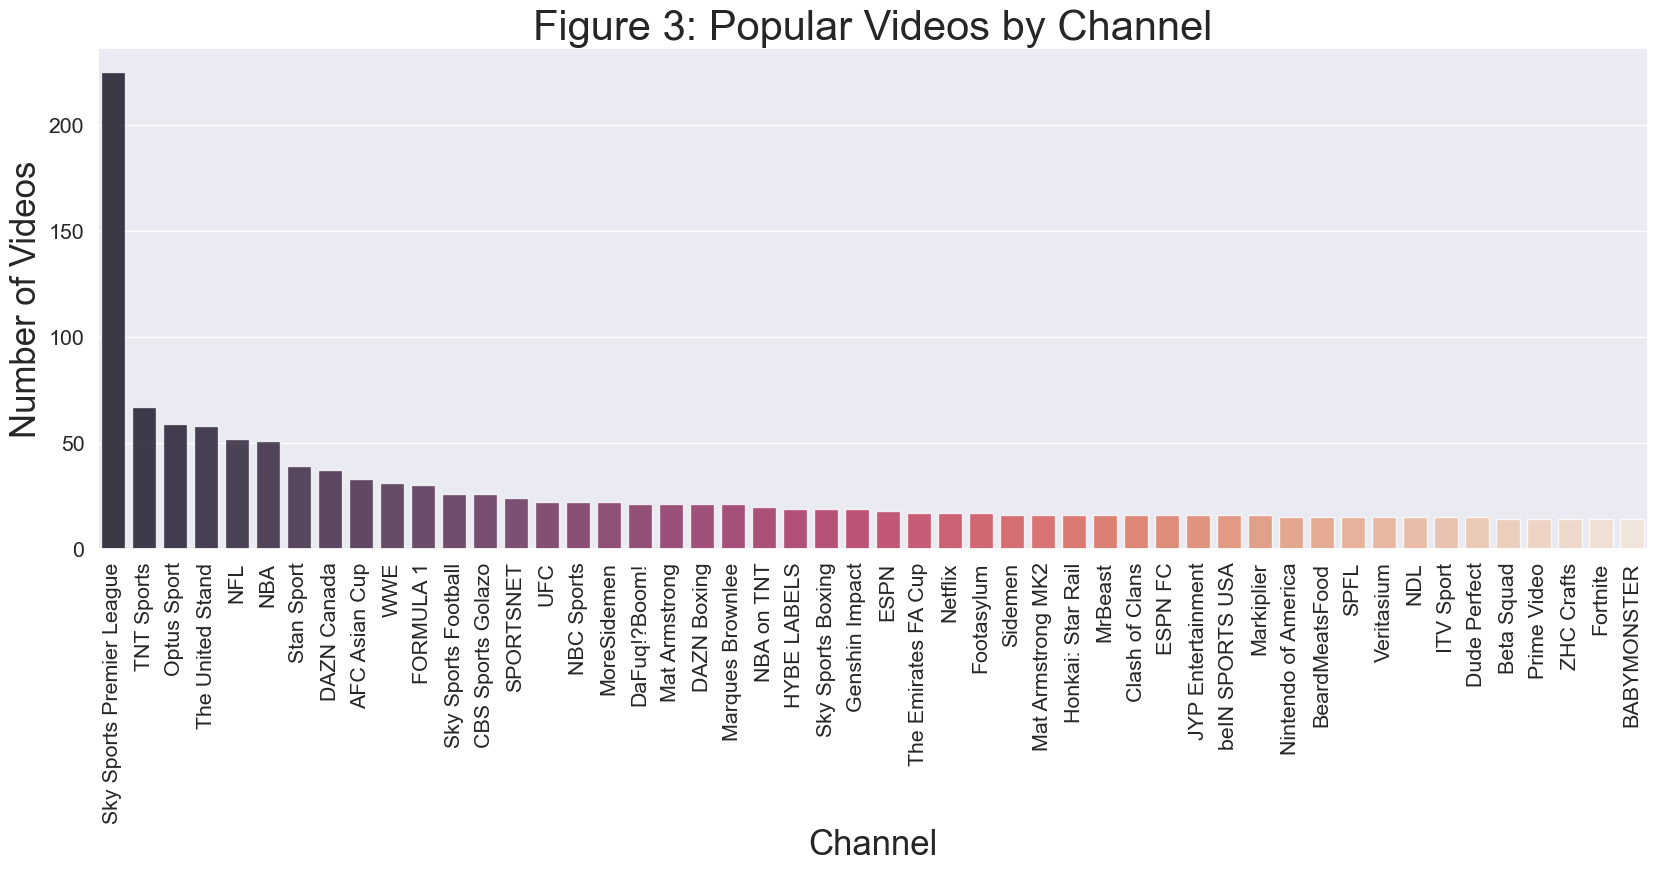

In [29]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = youtube['channel_title'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Popular Videos by Channel', fontsize=30)
plt.show()

In [30]:
# Convert 'publish_date' to datetime if it's not already
youtube['publish_date'] = pd.to_datetime(youtube['publish_date'])

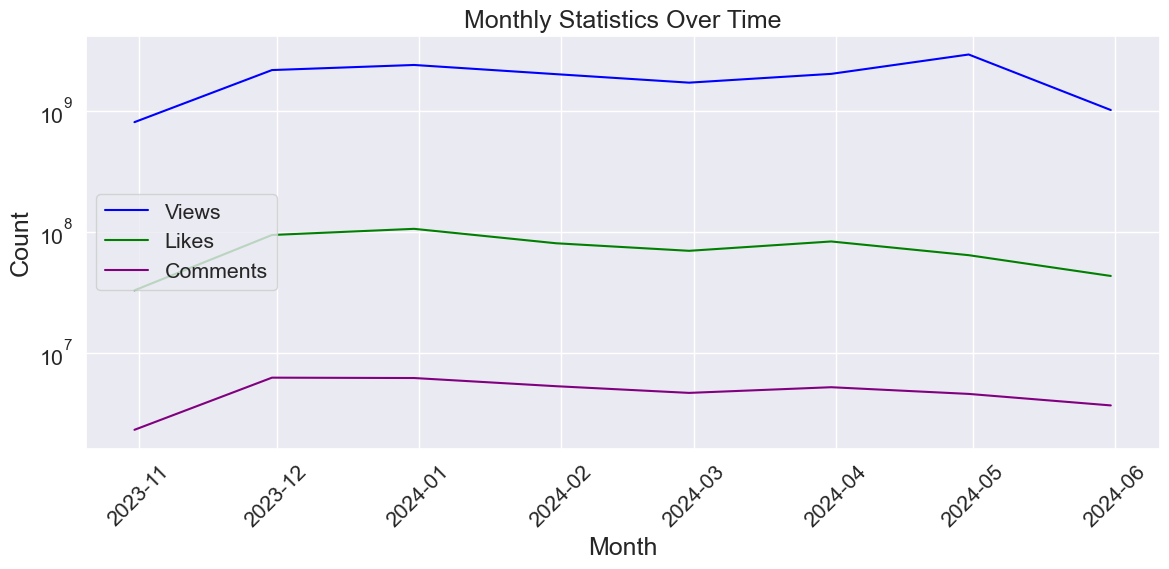

In [31]:
# Set 'publish_date' as the index
youtube.set_index('publish_date', inplace=True)

# Group data by month and aggregate statistics
monthly_stats = youtube.resample('M')[['view_count', 'like_count', 'comment_count']].sum()

# Plotting
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats.index, monthly_stats['view_count'], label='Views', color='blue')
plt.plot(monthly_stats.index, monthly_stats['like_count'], label='Likes', color='green')
plt.plot(monthly_stats.index, monthly_stats['comment_count'], label='Comments', color='purple')
plt.title('Monthly Statistics Over Time', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend()
plt.yscale('log') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10246 entries, 2024-04-01 00:00:00+00:00 to 2023-11-22 00:00:00+00:00
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    10246 non-null  object 
 1   daily_rank               10246 non-null  int64  
 2   daily_movement           10246 non-null  int64  
 3   weekly_movement          10246 non-null  int64  
 4   country                  10246 non-null  object 
 5   view_count               10246 non-null  int64  
 6   like_count               10246 non-null  int64  
 7   comment_count            10246 non-null  int64  
 8   description              10246 non-null  object 
 9   video_id                 10246 non-null  object 
 10  channel_id               10246 non-null  object 
 11  video_tags               10246 non-null  object 
 12  langauge                 10246 non-null  object 
 13  channel_title            1024